In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from cordova_plugins import d_plugins
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# Import Dataset

In [2]:
df_api = pd.read_csv("../db/cdv/cordova_API_xml.csv")
df_plugin_declaration = pd.read_csv("../db/cdv/cordova_PLUGIN_DECLARATION_xml.csv")
# df_feature = pd.read_csv("../db/fcordova/eatures.csv")


In [3]:
df_api.columns

Index(['apk_name', 'battery-status', 'camera', 'contacts', 'device', 'dialogs',
       'file', 'geolocation', 'globalization', 'inappbrowser', 'media',
       'media-capture', 'network-information', 'splashscreen', 'statusbar',
       'vibration'],
      dtype='object')

In [4]:
l_api = list(df_api.columns)
l_api

['apk_name',
 'battery-status',
 'camera',
 'contacts',
 'device',
 'dialogs',
 'file',
 'geolocation',
 'globalization',
 'inappbrowser',
 'media',
 'media-capture',
 'network-information',
 'splashscreen',
 'statusbar',
 'vibration']

In [5]:
df_api

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,com.pr.ojectblue.dothis,13,33,41,7,2,5,8,0,0,1,2,5,0,0,0
1,com.indiageeks.apk,13,9,75,1,13,1,1,1,0,94,1,5,1,0,0
2,com.koimoi.android,13,8,75,4,2,8,1,1,0,94,1,11,1,0,0
3,com.activitylabs.bankbluffer,13,6,78,8,1,7,4,0,0,98,0,1,0,0,0
4,com.cooperbussmann.faultcurrentcalculator,13,9,75,3,2,8,1,1,0,94,1,11,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,com.weinor.weinor_service_en,13,8,75,6,2,8,1,1,0,2,1,3,1,0,0
534,sportstables.com,13,8,75,1,2,8,1,1,0,94,1,11,1,0,0
535,com.ugliapps.iheartfruits,12,3,45,3,0,6,0,0,0,74,0,1,0,0,0
536,sunnyappz.thesecretquotes,13,6,74,8,0,8,0,0,0,98,0,5,0,0,0


In [6]:
df_plugin_declaration

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,com.pr.ojectblue.dothis,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0
1,com.indiageeks.apk,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
2,com.koimoi.android,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
3,com.activitylabs.bankbluffer,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0
4,com.cooperbussmann.faultcurrentcalculator,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,com.weinor.weinor_service_en,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
534,sportstables.com,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
535,com.ugliapps.iheartfruits,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0
536,sunnyappz.thesecretquotes,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0


# Analyse API calls

## The occurances

### The occurances of funcitons detected for each plugin in each APK

In [7]:
df_plugins_only = df_api.drop(columns=["apk_name"])
df_plugins_only

,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,13,33,41,7,2,5,8,0,0,1,2,5,0,0,0
1,13,9,75,1,13,1,1,1,0,94,1,5,1,0,0
2,13,8,75,4,2,8,1,1,0,94,1,11,1,0,0
3,13,6,78,8,1,7,4,0,0,98,0,1,0,0,0
4,13,9,75,3,2,8,1,1,0,94,1,11,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,13,8,75,6,2,8,1,1,0,2,1,3,1,0,0
534,13,8,75,1,2,8,1,1,0,94,1,11,1,0,0
535,12,3,45,3,0,6,0,0,0,74,0,1,0,0,0
536,13,6,74,8,0,8,0,0,0,98,0,5,0,0,0


### The occurance of plugins for entire dataset

In [8]:
total_apk = df_plugins_only.shape[0]
print(f"Total APKs: {total_apk}")
df_cnt = df_plugins_only.astype(bool).sum(axis=0).sort_values(ascending=True)
df_cnt

Total APKs: 538


inappbrowser             0
vibration                0
statusbar               20
globalization          189
splashscreen           241
media-capture          275
geolocation            389
dialogs                405
battery-status         502
camera                 517
contacts               521
network-information    521
file                   522
media                  527
device                 533
dtype: int64

In [9]:
# percentage of apks using each plugin
df_pct = df_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_pct

inappbrowser            0.00
vibration               0.00
statusbar               3.72
globalization          35.13
splashscreen           44.80
media-capture          51.12
geolocation            72.30
dialogs                75.28
battery-status         93.31
camera                 96.10
contacts               96.84
network-information    96.84
file                   97.03
media                  97.96
device                 99.07
dtype: float64

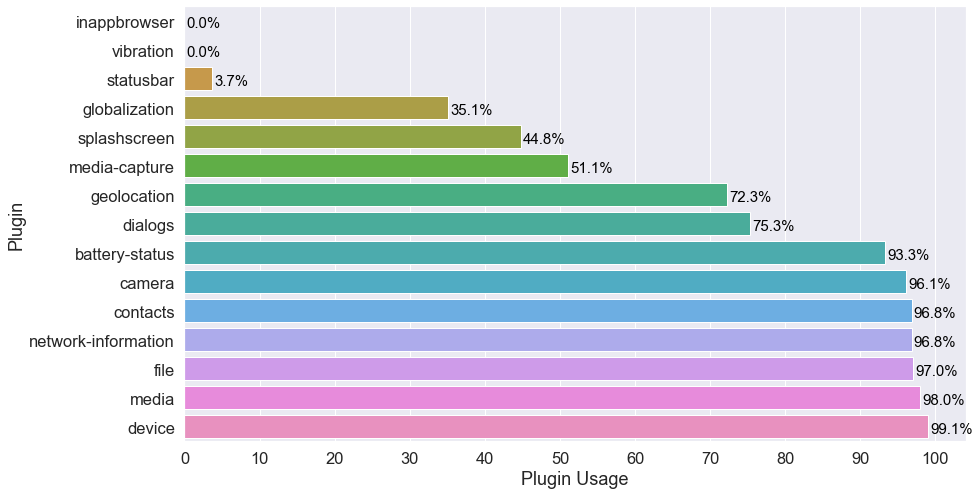

In [10]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_pct.values, y=df_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("Plugin Usage")
plt.ylabel("Plugin")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

### Plugins declaration

In [11]:
df_plugin_declaration_only = df_plugin_declaration.drop(columns=["apk_name"])
df_plugin_dc = df_plugin_declaration_only
total_apk = df_plugin_dc.shape[0]
print(f"Total APKs: {total_apk}")
df_plugin_dc_cnt = df_plugin_dc.astype(bool).sum(axis=0).sort_values(ascending=True)
df_plugin_dc_cnt

Total APKs: 538


statusbar                0
vibration                1
inappbrowser           212
globalization          248
splashscreen           399
battery-status         410
network-information    422
contacts               484
camera                 489
media-capture          493
geolocation            497
media                  498
file                   505
dialogs                517
device                 534
dtype: int64

In [12]:
# percentage of apks using each plugin
df_plugin_dc_pct = df_plugin_dc_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_plugin_dc_pct

statusbar               0.00
vibration               0.19
inappbrowser           39.41
globalization          46.10
splashscreen           74.16
battery-status         76.21
network-information    78.44
contacts               89.96
camera                 90.89
media-capture          91.64
geolocation            92.38
media                  92.57
file                   93.87
dialogs                96.10
device                 99.26
dtype: float64

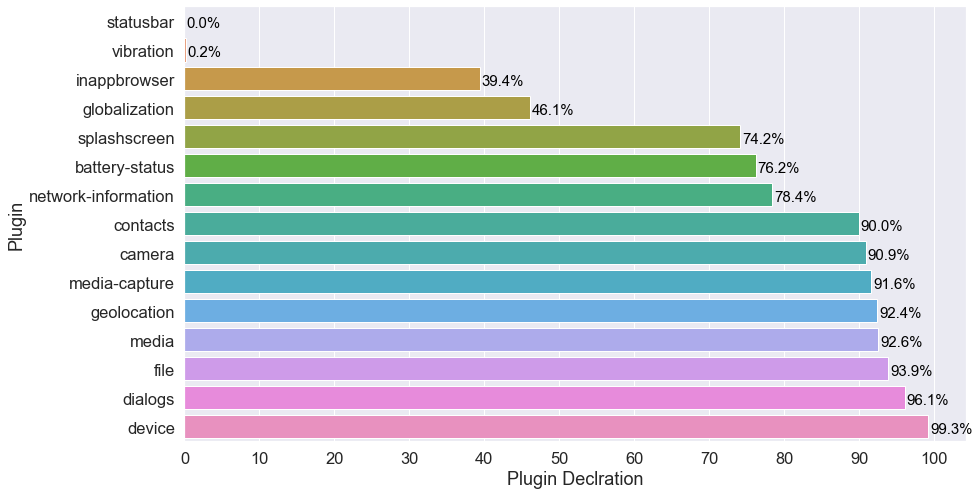

In [13]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_plugin_dc_pct.values, y=df_plugin_dc_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("Plugin Declration")
plt.ylabel("Plugin")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

### Plugin Uages VS. Plugin Dclaration

In [14]:
df_usage_cnt = df_plugins_only.astype(bool).sum(axis=0)
df_usage_cnt = df_usage_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_declaration_cnt = df_plugin_dc.astype(bool).sum(axis=0)
df_declaration_cnt = df_declaration_cnt.apply(lambda x: round(x/total_apk*100, 2))
d_plugin = {"plugin": list(df_usage_cnt.axes)}
d_usage = {"usage": list(df_usage_cnt.values)}
d_declaration = {"usage": list(df_declaration_cnt.values)}
d_plugin_vs = {
    "plugin": list(df_plugins_only.columns),
    "usage": list(df_usage_cnt.values),
    "declaration": list(df_declaration_cnt.values)
}
# print(d_plugin_vs)
df_plugin_vs = pd.DataFrame(data=d_plugin_vs)
df_plugin_vs

,plugin,usage,declaration
0,battery-status,93.31,76.21
1,camera,96.10,90.89
2,contacts,96.84,89.96
3,device,99.07,99.26
4,dialogs,75.28,96.10
5,file,97.03,93.87
6,geolocation,72.30,92.38
7,globalization,35.13,46.10
8,inappbrowser,0.00,39.41
9,media,97.96,92.57


In [15]:
# order by value in declaration
df_plugin_vs_order = df_plugin_vs.sort_values(by=['declaration'])
df_plugin_vs_order

,plugin,usage,declaration
13,statusbar,3.72,0.00
14,vibration,0.00,0.19
8,inappbrowser,0.00,39.41
7,globalization,35.13,46.10
12,splashscreen,44.80,74.16
0,battery-status,93.31,76.21
11,network-information,96.84,78.44
2,contacts,96.84,89.96
1,camera,96.10,90.89
10,media-capture,51.12,91.64


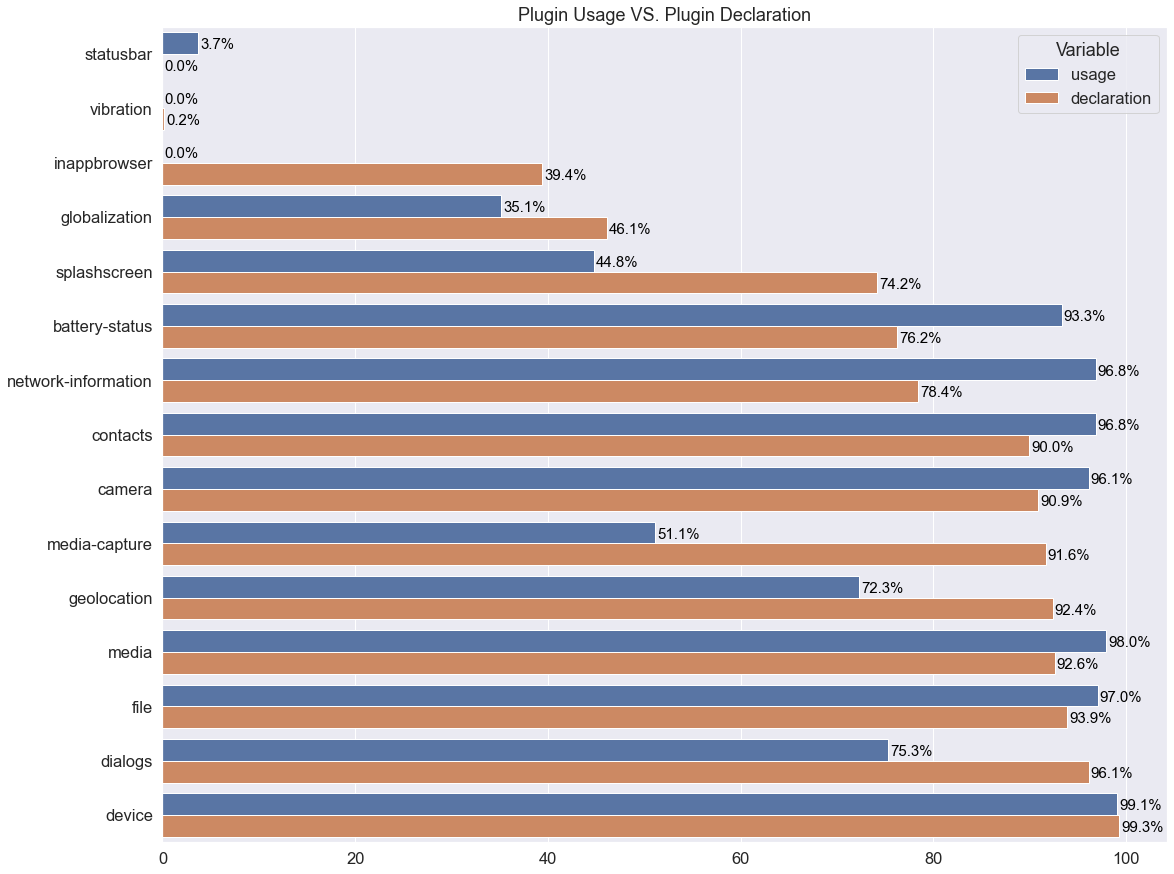

In [16]:
# ax = sns.barplot(x="Percentage", y="Plugin", hue="plugin", data=df_plugin_vs_order)
fig, ax1 = plt.subplots(figsize=(18, 15))
tidy = df_plugin_vs_order.melt(id_vars='plugin').rename(columns=str.title)
# print(tidy)
sns_pct = sns.barplot(x='Value', y='Plugin', hue='Variable', data=tidy, ax=ax1)
# sns.despine(fig)
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')
plt.xlabel("")
plt.ylabel("")
plt.title('Plugin Usage VS. Plugin Declaration')
plt.show()

## Heatmap

### Heatmap for Entire database

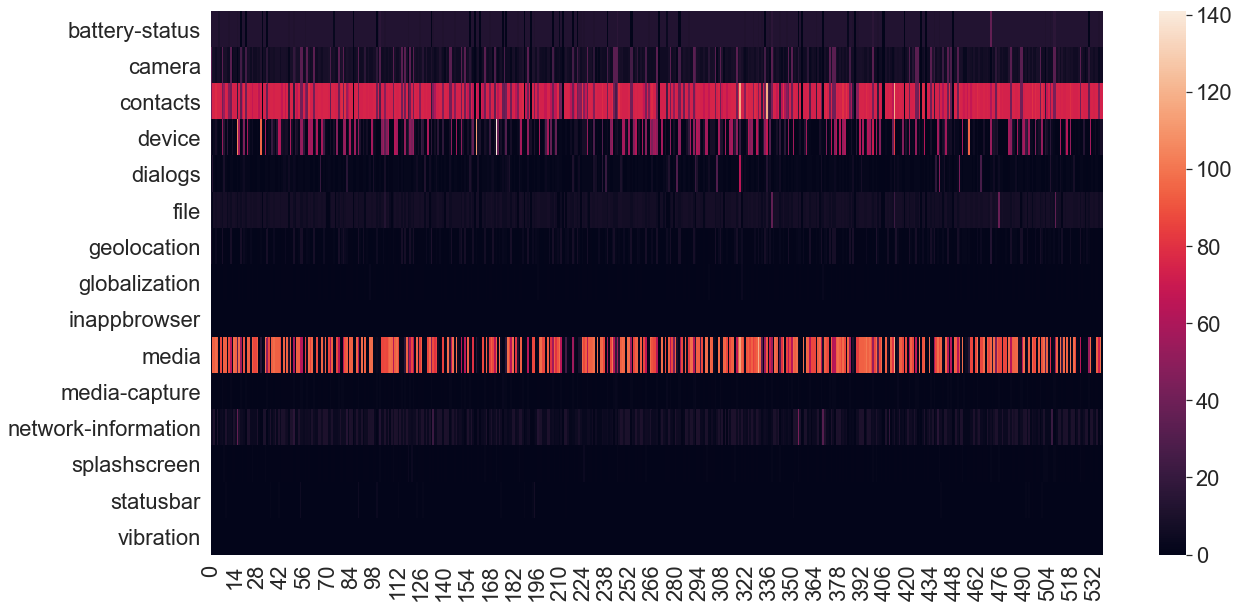

In [17]:
df_plugins_only_T = df_plugins_only.T    # transpose
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T)

### Heatmap for a small set of dataset

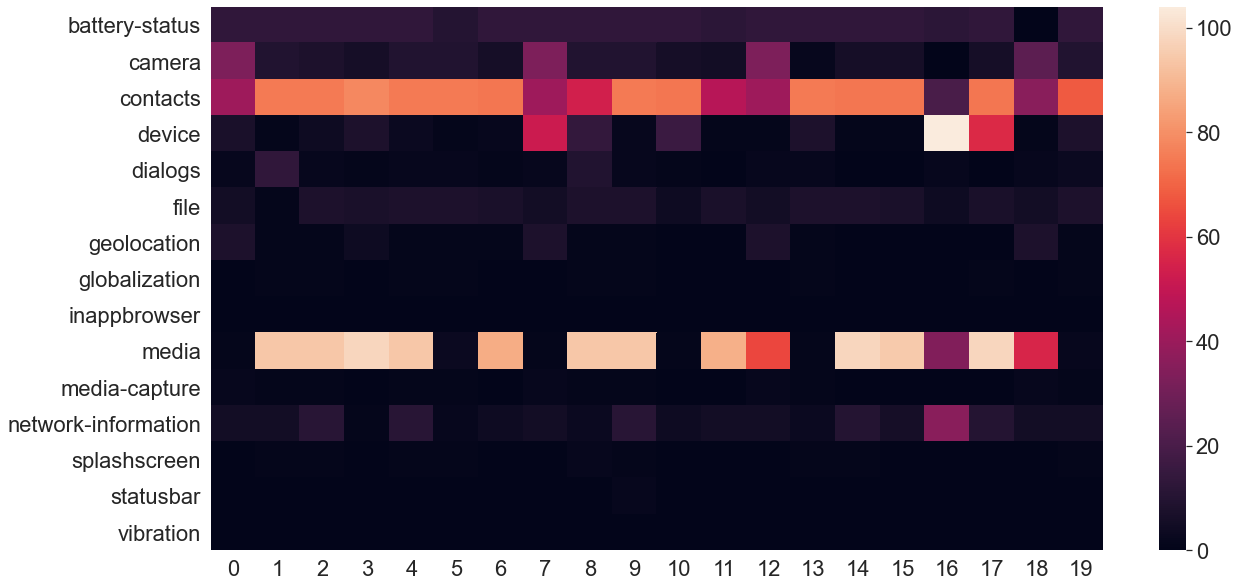

In [18]:
# select a set of apks, originial
set_num = 20
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num])


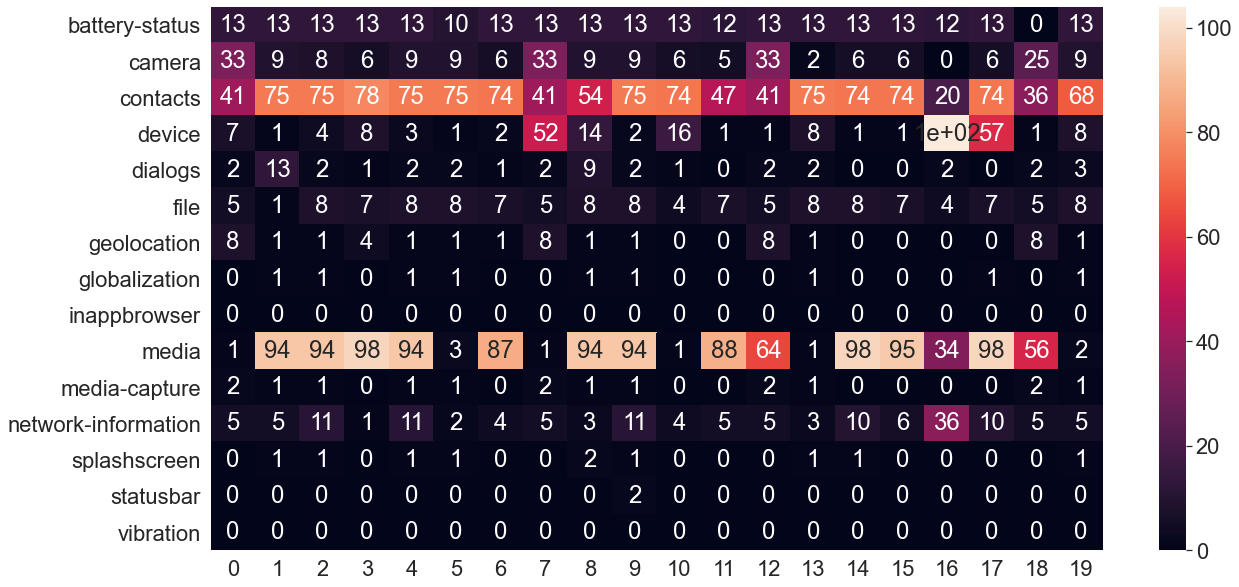

In [19]:
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num], annot=True)

### Heatmap without media and device

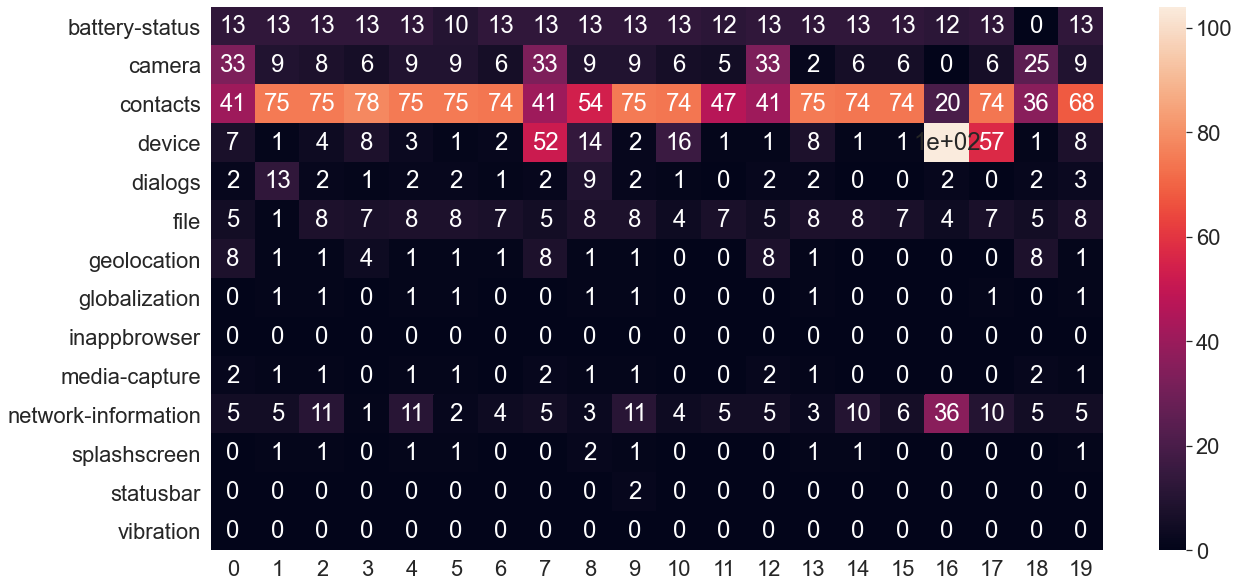

In [20]:

df_plugins_media = df_api.drop(columns=["apk_name", "media"])
df_plugins_media_T = df_plugins_media.T
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_media_T.iloc[:, :set_num], annot=True)